In [1]:
import os
import h5py
import gvar   as gv
import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt

def format(v):
    return gv.gvar(
        v.mean(axis=0),
        v.std(axis=0) * np.sqrt(v.shape[0]-1)
    )

# $R_{A_1}(\mathbb{p}>0)$

$$
 R_{A_1} = \frac{ C_{B_{1S}\rightarrow D^*_a}^{A_j}(\mathbf{p}_\perp,t,T) \,\, C_{D^*_a\rightarrow B_{1S}}^{A_j}(\mathbf{p}_\perp,t,T) }{  C_{D^*_a\rightarrow D^*_{1S}}^{V_4}(\mathbf{0},t,T) \,\,   C_{B_{1S}\rightarrow B_{1S}}^{V_4}(\mathbf{0},t,T) } / \frac{Z_{D^*_a}(\mathbf p_\perp)}{\sqrt{Z_{D^*_a}(0)Z_{D_{1S}^*}(0)}} \frac{{M_{D^*}}^2}{{E^2_{D^*}}(\mathbb p)} e^{-({E_{D^*}}(\mathbb p) - M_{D^*})T}
$$ 

In [2]:
from b2heavy.ThreePointFunctions.types3pts import RatioFileString, RatioIO, Ratio, ratio_prerequisites, ratio_correction_factor
from b2heavy.TwoPointFunctions.utils import jkCorr
from b2heavy.FnalHISQMetadata import params

frm = '/Users/pietro/code/data_analysis/data/QCDNf2p1stag/B2heavy/lattice24'
datadir = '/Users/pietro/code/data_analysis/BtoD/Alex/'


ens = 'Coarse-1'
mom = '300'
jk  = 11

mdata = params(ens)
Ta,Tb = mdata['hSinks']

heavy = '_k' + mdata['kBStr']
light = '_k' + mdata['kDStr']
qq    = '_m' + mdata['mlStr']

data = h5py.File(f'/Users/pietro/code/data_analysis/BtoD/Alex/Ensembles/FnalHISQ/a0.12/{mdata["hdf5File2"]}')
data = data['data']

$C_{B_{1S}\rightarrow D^*_a}^{A_j}(\mathbf{p}_\perp,t,T)$

In [3]:
file1 = RatioFileString('P5_A2_V2_',Ta,heavy,'1S',qq,light,mom)
file2 = RatioFileString('P5_A3_V3_',Ta,heavy,'1S',qq,light,mom)
n1a = np.array([
    jkCorr(data[file1][:,:Ta+1], bsize=jk),
    jkCorr(data[file2][:,:Ta+1], bsize=jk),
])

print(f'{file1 = }')
print(f'{file2 = }')


# ==============================================================
file1 = RatioFileString('P5_A2_V2_',Tb,heavy,'1S',qq,light,mom)
file2 = RatioFileString('P5_A3_V3_',Tb,heavy,'1S',qq,light,mom)
n1b = np.array([
    jkCorr(data[file1][:,:Ta+1], bsize=jk),
    jkCorr(data[file2][:,:Ta+1], bsize=jk),
])

file1 = 'P5_A2_V2_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.12201_p300'
file2 = 'P5_A3_V3_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.12201_p300'


$C_{D^*_a\rightarrow B_{1S}}^{A_j}(\mathbf{p}_\perp,t,T) \longleftarrow C_{B_{1S}\rightarrow D^*_a}^{A_j}(\mathbf{p}_\perp,T-t,T)$

In [4]:
n2a = np.flip(n1a,axis=2)
n2b = np.flip(n1b,axis=2)

$C_{B_{1S}\rightarrow B_{1S}}^{V_4}(\mathbf{0},t,T)$

In [5]:
file1 = RatioFileString('P5_V4_P5_',Ta,heavy,'1S',qq,heavy,'000')
file2 = RatioFileString('P5_V4_P5_',Tb,heavy,'1S',qq,heavy,'000')

d1a = jkCorr(data[file1][:,:Ta+1], bsize=jk)
d1b = jkCorr(data[file2][:,:Ta+1], bsize=jk)

print(f'{file1 = }')
print(f'{file2 = }')

file1 = 'P5_V4_P5_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.08574_p000'
file2 = 'P5_V4_P5_T13_k0.08574_RW_1S_rot_rot_m0.00507_k0.08574_p000'


$C_{D^*_a\rightarrow D^*_{1S}}^{V_4}(\mathbf{0},t,T)$

In [6]:
file1 = RatioFileString('V1_V4_V1_',Ta,light,'1S',qq,light,'000')
file2 = RatioFileString('V1_V4_V1_',Tb,light,'1S',qq,light,'000')

d2a = jkCorr(data[file1][:,:Ta+1], bsize=jk)
d2b = jkCorr(data[file2][:,:Ta+1], bsize=jk)

print(f'{file1 = }')
print(f'{file2 = }')

file1 = 'V1_V4_V1_T12_k0.12201_RW_1S_rot_rot_m0.00507_k0.12201_p000'
file2 = 'V1_V4_V1_T13_k0.12201_RW_1S_rot_rot_m0.00507_k0.12201_p000'


In [7]:
# first, multiply corr at numerator
# second, average numerator over directions

ra = (n1a * n2a).mean(axis=0) / (d1a * d2a)
rb = (n1b * n2b).mean(axis=0) / (d1b * d2b)

In [8]:
req = ratio_prerequisites(ens,'RA1',mom,readfrom=frm)
ratio_correction_factor('RA1',**req)

{'RW': 20.453929716505453, '1S': 4.91133054148262}

In [9]:
fa = req['Zbot']['1S'] / np.sqrt(req['Z0']['1S'] * req['Z0']['1S']) * req['m0']**2/req['E0']**2
fb = req['Zbot']['1S'] / np.sqrt(req['Z0']['1S'] * req['Z0']['1S']) * req['m0']**2/req['E0']**2

ra_corr = ra/fa
rb_corr = ra/fb

In [10]:
format(ra)

array([0.0418(47), 0.0438(39), 0.0464(40), 0.0479(39), 0.0491(41),
       0.0490(42), 0.0495(43), 0.0490(42), 0.0490(40), 0.0478(39),
       0.0463(40), 0.0436(39), 0.0412(47)], dtype=object)

In [11]:
format(ra_corr)

array([0.205(23), 0.215(19), 0.228(20), 0.235(19), 0.241(20), 0.241(21),
       0.243(21), 0.241(21), 0.240(20), 0.235(19), 0.227(20), 0.214(19),
       0.202(23)], dtype=object)

### smooth

In [12]:
e_deta = np.exp((req['E0']-req['m0'])*Ta)
e_detb = np.exp((req['E0']-req['m0'])*Tb)

print(f'{e_deta = }')
print(f'{e_detb = }')

e_deta = 3.2536365121100004
e_detb = 3.589768583782076


In [13]:
ra1 = ra_corr*e_deta /2 + rb_corr*e_detb /4 + np.roll(rb_corr*e_detb ,-1,axis=1)/4

In [14]:
format(ra1)

array([0.711(75), 0.747(66), 0.786(67), 0.810(67), 0.824(69), 0.826(71),
       0.830(71), 0.824(70), 0.818(67), 0.796(66), 0.766(67), 0.723(68),
       0.695(79)], dtype=object)

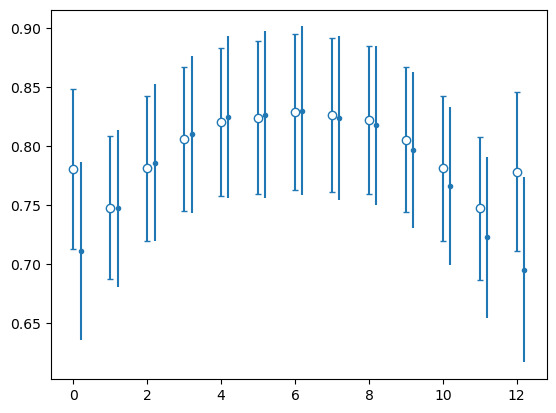

In [19]:
fig, ax = plt.subplots(1,1)

ax.errorbar(
    np.arange(ra1.shape[1])+0.2,
    ra1.mean(axis=0),
    ra1.std(axis=0) * np.sqrt(ra1.shape[0]-1),
    fmt='.'
)


io = RatioIO(ens,'RA1',mom,PathToDataDir=datadir)
ra1obj = Ratio(io,jkBin=jk,**req,smearing=['1S'])
ra1obj.plot(ax)

## confront momenta

In [45]:
file1 = RatioFileString('P5_A2_V2_',Ta,heavy,'1S',qq,light,'100')
file2 = RatioFileString('P5_A3_V3_',Ta,heavy,'1S',qq,light,'100')
n1 = np.array([
    jkCorr(data[file1][:,:Ta+1], bsize=jk),
    jkCorr(data[file2][:,:Ta+1], bsize=jk),
])

file1 = RatioFileString('P5_A2_V2_',Ta,heavy,'1S',qq,light,'300')
file2 = RatioFileString('P5_A3_V3_',Ta,heavy,'1S',qq,light,'300')
n2 = np.array([
    jkCorr(data[file1][:,:Ta+1], bsize=jk),
    jkCorr(data[file2][:,:Ta+1], bsize=jk),
])

In [46]:
n1.sum(axis=0).mean(axis=0)

array([-9.88969179e-10, -2.11287834e-09, -4.69485661e-09, -1.04734922e-08,
       -2.33956314e-08, -5.27287083e-08, -1.18105783e-07, -2.63717459e-07,
       -5.88656909e-07, -1.31339180e-06, -2.93396101e-06, -6.52264548e-06,
       -1.43327178e-05])

In [47]:
n2.sum(axis=0).mean(axis=0)

array([-4.91784192e-10, -9.49533041e-10, -1.96204433e-09, -4.02200146e-09,
       -8.16236311e-09, -1.67090529e-08, -3.35534140e-08, -6.68157732e-08,
       -1.36179967e-07, -2.69464036e-07, -5.32677728e-07, -1.03347372e-06,
       -1.63828816e-06])

# $R_{A_1}(\mathbb{p}=0)$

$$
 R_{A_1} = \frac{ C_{B_{1S}\rightarrow D^*_a}^{A_j}(\mathbf{0},t,T) \,\, C_{D^*_a\rightarrow B_{1S}}^{A_j}(\mathbf{0},t,T) }{  C_{D^*_a\rightarrow D^*_{1S}}^{V_4}(\mathbf{0},t,T) \,\,   C_{B_{1S}\rightarrow B_{1S}}^{V_4}(\mathbf{0},t,T) } \frac{Z_{D^*_a}(\mathbf 0)}{\sqrt{Z_{D^*_a}(0)Z_{D_{1S}^*}(0)}}
$$ 

In [7]:
file1 = RatioFileString('P5_A1_V1_',Ta,heavy,'1S',qq,light,'000')
file2 = RatioFileString('P5_A2_V2_',Ta,heavy,'1S',qq,light,'000')
file3 = RatioFileString('P5_A3_V3_',Ta,heavy,'1S',qq,light,'000')

print(f'{file1 = }')
print(f'{file2 = }')
print(f'{file3 = }')

n1a = np.array([
    jkCorr(data[file1][:,:Ta+1], bsize=jk),
    jkCorr(data[file2][:,:Ta+1], bsize=jk),
    jkCorr(data[file3][:,:Ta+1], bsize=jk),
])

# ===================================================================
file1 = RatioFileString('P5_A1_V1_',Tb,heavy,'1S',qq,light,'000')
file2 = RatioFileString('P5_A2_V2_',Tb,heavy,'1S',qq,light,'000')
file3 = RatioFileString('P5_A3_V3_',Tb,heavy,'1S',qq,light,'000')

n1b = np.array([
    jkCorr(data[file1][:,:Ta+1], bsize=jk),
    jkCorr(data[file2][:,:Ta+1], bsize=jk),
    jkCorr(data[file3][:,:Ta+1], bsize=jk),
])

file1 = 'P5_A1_V1_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.12201_p000'
file2 = 'P5_A2_V2_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.12201_p000'
file3 = 'P5_A3_V3_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.12201_p000'


In [8]:
file1 = RatioFileString('V1_A1_P5_',Ta,light,'1S',qq,heavy,'000')
file2 = RatioFileString('V1_A2_P5_',Ta,light,'1S',qq,heavy,'000')
file3 = RatioFileString('V1_A3_P5_',Ta,light,'1S',qq,heavy,'000')

print(f'{file1 = }')
print(f'{file2 = }')
print(f'{file3 = }')

n2a = np.array([
    jkCorr(data[file1][:,:Ta+1], bsize=jk),
    jkCorr(data[file2][:,:Ta+1], bsize=jk),
    jkCorr(data[file3][:,:Ta+1], bsize=jk),
])


# ===================================================================
file1 = RatioFileString('V1_A1_P5_',Tb,light,'1S',qq,heavy,'000')
file2 = RatioFileString('V1_A2_P5_',Tb,light,'1S',qq,heavy,'000')
file3 = RatioFileString('V1_A3_P5_',Tb,light,'1S',qq,heavy,'000')

n2b = np.array([
    jkCorr(data[file1][:,:Ta+1], bsize=jk),
    jkCorr(data[file2][:,:Ta+1], bsize=jk),
    jkCorr(data[file3][:,:Ta+1], bsize=jk),
])

file1 = 'V1_A1_P5_T12_k0.12201_RW_1S_rot_rot_m0.00507_k0.08574_p000'
file2 = 'V1_A2_P5_T12_k0.12201_RW_1S_rot_rot_m0.00507_k0.08574_p000'
file3 = 'V1_A3_P5_T12_k0.12201_RW_1S_rot_rot_m0.00507_k0.08574_p000'


In [9]:
file1 = RatioFileString('V1_V4_V1_',Ta,light,'1S',qq,light,'000')

print(f'{file1 = }')

d1a = jkCorr(data[file1][:,:Ta+1], bsize=jk)


# ================================================================
file1 = RatioFileString('V1_V4_V1_',Tb,light,'1S',qq,light,'000')
d1b = jkCorr(data[file1][:,:Ta+1], bsize=jk)

file1 = 'V1_V4_V1_T12_k0.12201_RW_1S_rot_rot_m0.00507_k0.12201_p000'


In [10]:
file1 = RatioFileString('P5_V4_P5_',Ta,heavy,'1S',qq,heavy,'000')

print(f'{file1 = }')

d2a = jkCorr(data[file1][:,:Ta+1],bsize=jk)


# ================================================================
file1 = RatioFileString('P5_V4_P5_',Tb,heavy,'1S',qq,heavy,'000')
d2b = jkCorr(data[file1][:,:Ta+1],bsize=jk)

file1 = 'P5_V4_P5_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.08574_p000'


In [11]:
ra = (n1a*n2a).sum(axis=0)/d1a/d2a
rb = (n1b*n2b).sum(axis=0)/d1b/d2b

### smooth

In [12]:
ra1 = ra/2 + rb/4 + np.roll(rb,-1,axis=1)/4

In [13]:
ra1.mean(axis=0)

array([-0.96981419, -0.83673726, -0.83158114, -0.82871928, -0.82533275,
       -0.82561106, -0.82497621, -0.82858643, -0.83463746, -0.84075337,
       -0.85173603, -0.86519267, -0.97390577])

## build-in

In [17]:
io = RatioIO(ens,'ZRA1','000',PathToDataDir='/Users/pietro/code/data_analysis/BtoD/Alex/')

req = ratio_prerequisites(ens,'ZRA1','000',readfrom=frm)
zra1 = Ratio(io,jkBin=11,smearing=['1S','RW'],**req)

In [18]:
zra1.format()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 {'1S': array([-0.970(23), -0.837(19), -0.832(19), -0.829(19), -0.825(18),
         -0.826(19), -0.825(19), -0.829(19), -0.835(19), -0.841(19),
         -0.852(20), -0.865(20), -0.996(23)], dtype=object),
  'RW': array([-0.1004(26), -0.0761(19), -0.0767(20), -0.0774(22), -0.0776(23),
         -0.0779(24), -0.0786(27), -0.0795(29), -0.0804(30), -0.0810(30),
         -0.0820(29), -0.0836(29), -0.0940(32)], dtype=object)})

In [19]:
req

{'E0': 1.0811885828863745,
 'm0': 1.0811885828863745,
 'Z0': {'1S': 4.834848433376765, 'd': 0.04165271597466671},
 'Zpar': {'1S': None, 'd': None},
 'Zbot': {'1S': None, 'd': None},
 'Zp': {'1S': None, 'd': None},
 'wrecoil': 1.0,
 'jk': False}

# other checks

<ErrorbarContainer object of 3 artists>

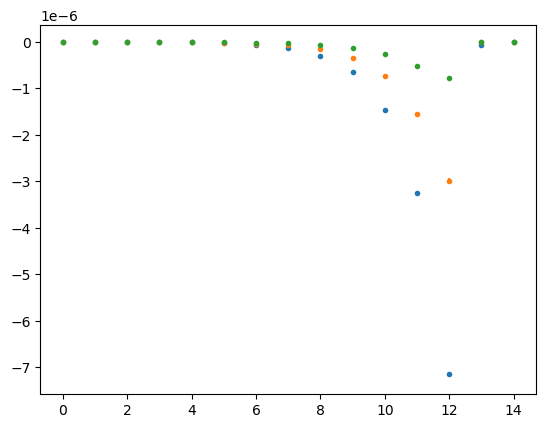

In [145]:
file1 = RatioFileString('P5_A2_V2_',Ta,heavy,'1S',qq,light,'100')
file2 = RatioFileString('P5_A2_V2_',Ta,heavy,'1S',qq,light,'200')
file3 = RatioFileString('P5_A2_V2_',Ta,heavy,'1S',qq,light,'300')

n1 = jkCorr(data[file1][:], bsize=jk)
n2 = jkCorr(data[file2][:], bsize=jk)
n3 = jkCorr(data[file3][:], bsize=jk)

tmax = 15
plt.errorbar(range(tmax),n1[:,:tmax].mean(axis=0),n1[:,:tmax].std(axis=0)*np.sqrt(tmax-1),fmt='.')
plt.errorbar(range(tmax),n2[:,:tmax].mean(axis=0),n2[:,:tmax].std(axis=0)*np.sqrt(tmax-1),fmt='.')
plt.errorbar(range(tmax),n3[:,:tmax].mean(axis=0),n3[:,:tmax].std(axis=0)*np.sqrt(tmax-1),fmt='.')

<ErrorbarContainer object of 3 artists>

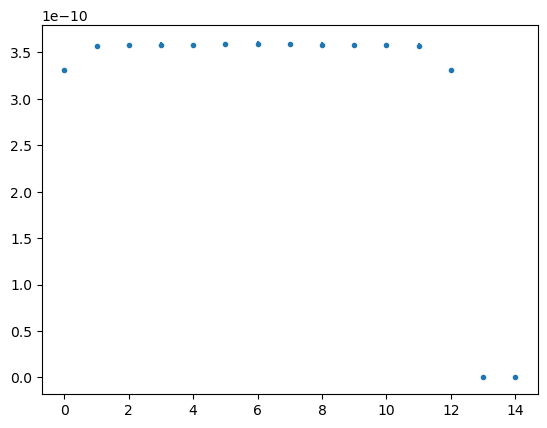

In [143]:
file1 = RatioFileString('P5_V4_P5_',Ta,heavy,'1S',qq,heavy,'000')

n1 = jkCorr(data[file1][:], bsize=jk)

tmax = 15
plt.errorbar(range(tmax),n1[:,:tmax].mean(axis=0),n1[:,:tmax].std(axis=0)*np.sqrt(tmax-1),fmt='.')

In [154]:
frm = '/Users/pietro/code/data_analysis/data/QCDNf2p1stag/B2heavy/lattice24'

p0 = read_config_fit(f'fit2pt_config_{ens}_Dst_000',jk=False,path=frm)[-1]
m0 = p0['E'][0]
Z0_1S = np.exp(p0['Z_1S_Unpol'][0])**2 * 2 * m0
Z0_d  = np.exp(p0['Z_d_Unpol' ][0])**2 * 2 * m0

for mom in ['100','200','300']:
    p2 = read_config_fit(f'fit2pt_config_{ens}_Dst_{mom}',jk=False,path=frm)[-1]

    e0 = p2['E'][0]
    Zp_1S = np.exp(p2['Z_1S_Bot'][0])**2 * 2 * e0
    Zp_d = np.exp(p2['Z_d_Bot'  ][0])**2 * 2 * e0

    fa = Zp_1S / np.sqrt(Z0_1S * Z0_1S) * m0**2/e0**2 * np.exp((e0-m0)*Ta)

    print(fa)


0.94(28)
1.00(31)
0.66(33)


# $R_+$

$$
    \frac{
        C^{V_4}_{B_{1S}\rightarrow D_a} (\mathbf 0, t) C^{V_4}_{D_a\rightarrow B_{1S}} (\mathbf 0, t)
    }{
        C^{V_4}_{D_a\rightarrow D_a} (\mathbf 0, t) C^{V_4}_{B_{1S}\rightarrow B_{1S}} (\mathbf 0, t)
    }
$$

### from scratch

In [7]:
from b2heavy.ThreePointFunctions.types3pts import RatioFileString, RatioIO, Ratio, ratio_prerequisites, ratio_correction_factor
from b2heavy.TwoPointFunctions.utils import jkCorr
from b2heavy.FnalHISQMetadata import params

ens = 'Coarse-1'
mom = '300'
jk  = 11

mdata = params(ens)
Ta,Tb = mdata['hSinks']

heavy = '_k' + mdata['kBStr']
light = '_k' + mdata['kDStr']
qq    = '_m' + mdata['mlStr']

data = h5py.File(f'/Users/pietro/code/data_analysis/BtoD/Alex/Ensembles/FnalHISQ/a0.12/{mdata["hdf5File2"]}')
data = data['data']

In [17]:
file1 = RatioFileString('P5_V4_P5_',Ta,heavy,'1S',qq,light,'000')
file2 = RatioFileString('P5_V4_P5_',Ta,light,'1S',qq,heavy,'000')
file3 = RatioFileString('P5_V4_P5_',Ta,heavy,'1S',qq,heavy,'000')
file4 = RatioFileString('P5_V4_P5_',Ta,light,'1S',qq,light,'000')
print(f'{file1 = }')
print(f'{file2 = }')
print(f'{file3 = }')
print(f'{file4 = }')

n1a = jkCorr(data[file1][:,:Ta+1], bsize=jk)
n2a = jkCorr(data[file2][:,:Ta+1], bsize=jk)
d1a = jkCorr(data[file3][:,:Ta+1], bsize=jk)
d2a = jkCorr(data[file4][:,:Ta+1], bsize=jk)



# ==================================================================
file1 = RatioFileString('P5_V4_P5_',Tb,heavy,'1S',qq,light,'000')
file2 = RatioFileString('P5_V4_P5_',Tb,light,'1S',qq,heavy,'000')
file3 = RatioFileString('P5_V4_P5_',Tb,heavy,'1S',qq,heavy,'000')
file4 = RatioFileString('P5_V4_P5_',Tb,light,'1S',qq,light,'000')

n1b = jkCorr(data[file1][:,:Ta+1], bsize=jk)
n2b = jkCorr(data[file2][:,:Ta+1], bsize=jk)
d1b = jkCorr(data[file3][:,:Ta+1], bsize=jk)
d2b = jkCorr(data[file4][:,:Ta+1], bsize=jk)

file1 = 'P5_V4_P5_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.12201_p000'
file2 = 'P5_V4_P5_T12_k0.12201_RW_1S_rot_rot_m0.00507_k0.08574_p000'
file3 = 'P5_V4_P5_T12_k0.08574_RW_1S_rot_rot_m0.00507_k0.08574_p000'
file4 = 'P5_V4_P5_T12_k0.12201_RW_1S_rot_rot_m0.00507_k0.12201_p000'


In [23]:
ra = n1a * n2a / d1a / d2a
rb = n1b * n2b / d1b / d2b

ratio = ra/2 + rb/4 + np.roll(rb,-1,axis=1)/4

### custom

In [27]:
req = {}

In [30]:
io = RatioIO(ens,'RPLUS','000',PathToDataDir='/Users/pietro/code/data_analysis/BtoD/Alex/')
r  = Ratio(io,jkBin=jk,smearing=['1S','RW'],**req)

In [32]:
x,y,ally = r.format(alljk=True)

In [35]:
ally['RW']

array([[0.9561461 , 0.99287618, 0.99814876, ..., 1.00466565, 1.0010547 ,
        0.97927631],
       [0.95652279, 0.99345901, 0.99874712, ..., 1.00425573, 1.00076433,
        0.97898242],
       [0.95600751, 0.99276406, 0.99789298, ..., 1.00326228, 0.99971866,
        0.97828827],
       ...,
       [0.9561136 , 0.99309764, 0.9978351 , ..., 1.00324414, 1.00063135,
        0.97915   ],
       [0.95672069, 0.99384134, 0.99901697, ..., 1.00425852, 1.00108543,
        0.97934073],
       [0.95740169, 0.9945075 , 0.99991189, ..., 1.00440092, 1.00081593,
        0.97934325]])

In [37]:
y['1S']

array([0.9837(27), 1.0031(31), 1.0058(37), 1.0075(44), 1.0078(47),
       1.0074(50), 1.0076(49), 1.0062(46), 1.0054(40), 1.0049(34),
       1.0041(26), 1.0035(21), 0.9838(17)], dtype=object)

In [34]:
ratio

array([[0.9836884 , 1.00318526, 1.00613508, ..., 1.00434346, 1.00360958,
        0.9827658 ],
       [0.98324744, 1.00257811, 1.00529675, ..., 1.00414267, 1.0035227 ,
        0.98263323],
       [0.98372437, 1.0029683 , 1.00558839, ..., 1.00437818, 1.00371223,
        0.98307041],
       ...,
       [0.98390153, 1.00335255, 1.00590368, ..., 1.00409954, 1.00356922,
        0.98292618],
       [0.98370048, 1.00291886, 1.00541615, ..., 1.0041642 , 1.00361514,
        0.98281041],
       [0.98391301, 1.0032247 , 1.00585661, ..., 1.00387815, 1.00330996,
        0.98285926]])

# $R_-$

$$
    \frac{
        C^{V_i}_{B_{1S}\rightarrow D_a} (\mathbf p, t) 
    }{
        C^{V_4}_{B_{1S}\rightarrow D_a} (\mathbf p, t) 
    }
$$

In [96]:
from b2heavy.ThreePointFunctions.types3pts import RatioFileString, RatioIO, Ratio, ratio_prerequisites, ratio_correction_factor
from b2heavy.TwoPointFunctions.utils import jkCorr
from b2heavy.FnalHISQMetadata import params

ens = 'SuperFine'
mom = '100'
jk  = 11

mdata = params(ens)
Ta,Tb = mdata['hSinks']

heavy = '_k' + mdata['kBStr']
light = '_k' + mdata['kDStr']
qq    = '_m' + mdata['mlStr']

data = h5py.File(f'/Users/pietro/code/data_analysis/BtoD/Alex/Ensembles/FnalHISQ/a0.057/{mdata["hdf5File2"]}')
data = data['data']

In [98]:
file1 = RatioFileString('P5_V1_P5_',Ta,heavy,'1S',qq,light,mom)
file2 = RatioFileString('P5_V4_P5_',Ta,heavy,'1S',qq,light,mom)
print(f'{file1 = }')
print(f'{file2 = }')

n1a = jkCorr(data[file1][:,:Ta+1], bsize=jk)
d1a = jkCorr(data[file2][:,:Ta+1], bsize=jk)


# ==================================================================
file1 = RatioFileString('P5_V1_P5_',Tb,heavy,'1S',qq,light,mom)
file2 = RatioFileString('P5_V4_P5_',Tb,heavy,'1S',qq,light,mom)
print(f'{file1 = }')
print(f'{file2 = }')

n1b = jkCorr(data[file1][:,:Ta+1], bsize=jk)
d1b = jkCorr(data[file2][:,:Ta+1], bsize=jk)

file1 = 'P5_V1_P5_T24_k0.10604_RW_1S_rot_rot_m0.0008_k0.129311_p100'
file2 = 'P5_V4_P5_T24_k0.10604_RW_1S_rot_rot_m0.0008_k0.129311_p100'
file1 = 'P5_V1_P5_T25_k0.10604_RW_1S_rot_rot_m0.0008_k0.129311_p100'
file2 = 'P5_V4_P5_T25_k0.10604_RW_1S_rot_rot_m0.0008_k0.129311_p100'


In [101]:
ra = n1a / d1a
rb = n1b / d1b

ratio = ra/2 + rb/4 + np.roll(rb,-1,axis=1)/4

In [102]:
ratio

array([[-0.10654557, -0.05023014, -0.05397524, ..., -0.06470621,
        -0.06359836, -0.12315194],
       [-0.10631624, -0.05056947, -0.05421862, ..., -0.06470421,
        -0.06362187, -0.12383378],
       [-0.10659962, -0.05044445, -0.05417375, ..., -0.06487772,
        -0.06370537, -0.12402263],
       ...,
       [-0.10692535, -0.05080583, -0.05471515, ..., -0.06473423,
        -0.06358821, -0.12353786],
       [-0.10650663, -0.05059793, -0.05431058, ..., -0.0647516 ,
        -0.06368461, -0.12342961],
       [-0.10598105, -0.0511101 , -0.05469335, ..., -0.06480461,
        -0.06369339, -0.12348902]])

In [103]:
io = RatioIO(ens,'R-',mom,PathToDataDir='/Users/pietro/code/data_analysis/BtoD/Alex/')
r  = Ratio(io,jkBin=jk,smearing=['1S','RW'],**{})

<ErrorbarContainer object of 3 artists>

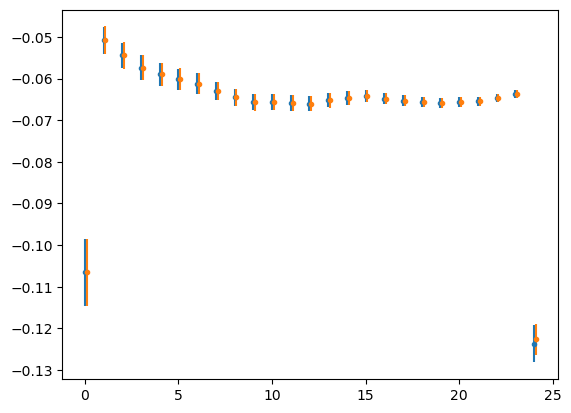

In [104]:
plt.errorbar(
    np.arange(ratio.shape[1]),
    gv.mean(format(ratio)),
    gv.sdev(format(ratio)),
    fmt='.'
)


x = r.format()[1]['1S']
plt.errorbar(
    np.arange(ratio.shape[1])+0.1,
    gv.mean(x),
    gv.sdev(x),
    fmt='.'
)


# $Q_+$

In [13]:
from b2heavy.ThreePointFunctions.types3pts import RatioFileString, RatioIO, Ratio, ratio_prerequisites, ratio_correction_factor
from b2heavy.TwoPointFunctions.utils import jkCorr
from b2heavy.FnalHISQMetadata import params

ens = 'SuperFine'
mom = '100'
jk  = 11

mdata = params(ens)
Ta,Tb = mdata['hSinks']

heavy = '_k' + mdata['kBStr']
light = '_k' + mdata['kDStr']
qq    = '_m' + mdata['mlStr']

data = h5py.File(f'/Users/pietro/code/data_analysis/BtoD/Alex/Ensembles/FnalHISQ/a0.057/{mdata["hdf5File2"]}')
data = data['data']

In [14]:
file1 = RatioFileString('P5_V4_P5_',Ta,heavy,'1S',qq,light,mom)
file2 = RatioFileString('P5_V4_P5_',Ta,heavy,'1S',qq,light,'000')
print(f'{file1 = }')
print(f'{file2 = }')

n1a = jkCorr(data[file1][:,:Ta+1], bsize=jk)
d1a = jkCorr(data[file2][:,:Ta+1], bsize=jk)


# ==================================================================
file1 = RatioFileString('P5_V4_P5_',Tb,heavy,'1S',qq,light,mom)
file2 = RatioFileString('P5_V4_P5_',Tb,heavy,'1S',qq,light,'000')
print(f'{file1 = }')
print(f'{file2 = }')

n1b = jkCorr(data[file1][:,:Ta+1], bsize=jk)
d1b = jkCorr(data[file2][:,:Ta+1], bsize=jk)


file1 = 'P5_V4_P5_T24_k0.10604_RW_1S_rot_rot_m0.0008_k0.129311_p100'
file2 = 'P5_V4_P5_T24_k0.10604_RW_1S_rot_rot_m0.0008_k0.129311_p000'
file1 = 'P5_V4_P5_T25_k0.10604_RW_1S_rot_rot_m0.0008_k0.129311_p100'
file2 = 'P5_V4_P5_T25_k0.10604_RW_1S_rot_rot_m0.0008_k0.129311_p000'


In [15]:
ra = n1a / d1a
rb = n1b / d1b

In [16]:
ra

array([[0.95324275, 0.95287695, 0.95006893, ..., 0.88391958, 0.88082126,
        0.88490878],
       [0.95286859, 0.95255046, 0.94969537, ..., 0.88376643, 0.88069149,
        0.88478943],
       [0.95316402, 0.9527992 , 0.94993216, ..., 0.88385165, 0.88075515,
        0.88472126],
       ...,
       [0.95311924, 0.95287233, 0.95001655, ..., 0.88379111, 0.88070021,
        0.8847795 ],
       [0.9527446 , 0.95247952, 0.94965368, ..., 0.88363884, 0.88056099,
        0.8846775 ],
       [0.95281222, 0.95236743, 0.94945639, ..., 0.88379462, 0.8807072 ,
        0.88485243]])

In [17]:
from b2heavy.ThreePointFunctions.utils import read_config_fit

frm = '/Users/pietro/code/data_analysis/data/QCDNf2p1stag/B2heavy/lattice24'

p2 = read_config_fit(f'fit2pt_config_{ens}_D_{mom}',jk=False,path=frm)[-1]
p0 = read_config_fit(f'fit2pt_config_{ens}_D_000',  jk=False,path=frm)[-1]

e0 = p2['E'][0].mean
m0 = p0['E'][0].mean
Z0 = (np.exp(p0['Z_1S_Unpol'][0])**2).mean * 2 * m0
Zp = (np.exp(p2['Z_1S_Unpol'][0])**2).mean * 2 * e0

fac   = e0/m0 * Z0/Zp
fexp = np.exp((e0-m0)*np.arange(ra.shape[-1]))


In [18]:
print(f'{e0 = }')
print(f'{m0 = }')
print(f'{Z0 = }')
print(f'{Zp = }')

e0 = 0.5235935938223176
m0 = 0.519353506885909
Z0 = 2.43979214056965
Zp = 2.337155855497115


In [20]:
ra_c = ra * fac
rb_c = rb * fac

ratio = (ra_c/2 + rb_c/4 + np.roll(rb_c,-1,axis=1)/4) * fexp

ratio

array([[0.95555898, 0.95853347, 0.95993359, ..., 0.97201669, 0.97268202,
        0.99937726],
       [0.95514092, 0.9581544 , 0.95954481, ..., 0.97203604, 0.97271479,
        0.99922863],
       [0.95541871, 0.95842178, 0.95979882, ..., 0.97213865, 0.97280007,
        0.99928055],
       ...,
       [0.95531806, 0.95835732, 0.95971086, ..., 0.97195464, 0.97261712,
        0.99919531],
       [0.95532674, 0.95835811, 0.95974448, ..., 0.97190277, 0.97255549,
        0.99925371],
       [0.95535765, 0.95830088, 0.9596404 , ..., 0.97206436, 0.97272486,
        0.99939114]])

In [21]:
io = RatioIO(ens,'QPLUS',mom,PathToDataDir='/Users/pietro/code/data_analysis/BtoD/Alex/')
req = ratio_prerequisites(ens,'QPLUS',mom,readfrom=frm)
r  = Ratio(io,jkBin=jk,smearing=['1S','RW'],**req)

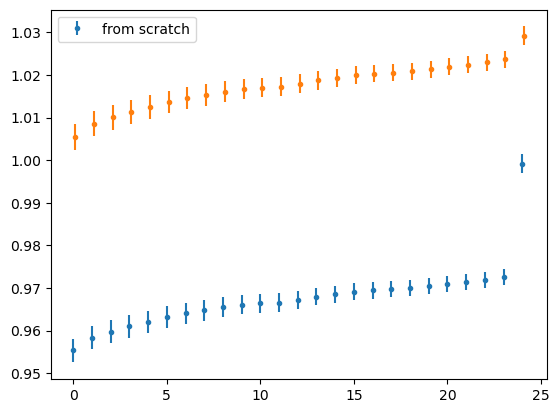

In [22]:
plt.errorbar(
    np.arange(ratio.shape[1]),
    gv.mean(format(ratio)),
    gv.sdev(format(ratio)),
    fmt='.',
    label='from scratch'
)


x = r.format()[1]['1S']
plt.errorbar(
    np.arange(ratio.shape[1])+0.1,
    gv.mean(x),
    gv.sdev(x),
    fmt='.'
)

plt.legend()

In [59]:
xx = np.ones((90,4))

rr = np.arange(90)

In [88]:
np.tile(rr,4).reshape(4,90).shape

(4, 90)

In [100]:
rr = np.random.normal(size=90)
cc = np.arange(10)

In [111]:
a = np.tile(cc,(90,1))
b = np.tile(rr,(10,1)).T

(a*b).shape

(90, 10)